In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings . filterwarnings('ignore')

In [38]:
df=pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [45]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [46]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [129]:
new_data = {'sex':{'male': 0 , 'female': 1} ,
                 'smoker':{'no': 0 , 'yes' :1},
                   'region':{'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}
data_copy = df.copy()
data_copy.replace(new_data, inplace=True)

In [130]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [132]:
data_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<Axes: >

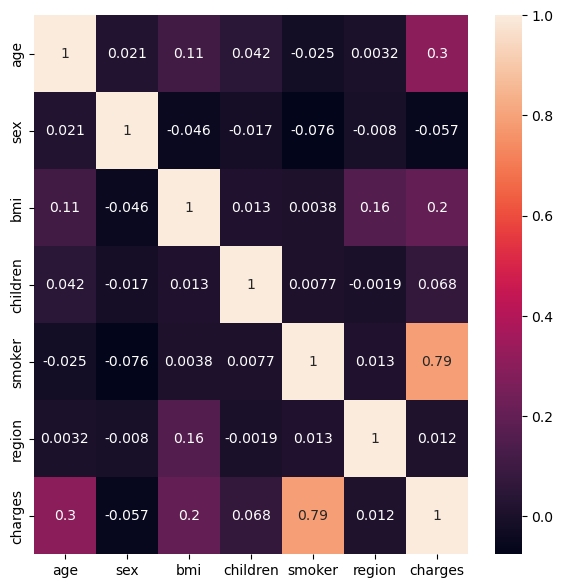

In [134]:
plt.figure(figsize=[7,7])
sns.heatmap(data_copy.corr(),annot=True)

In [139]:
data_copy['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

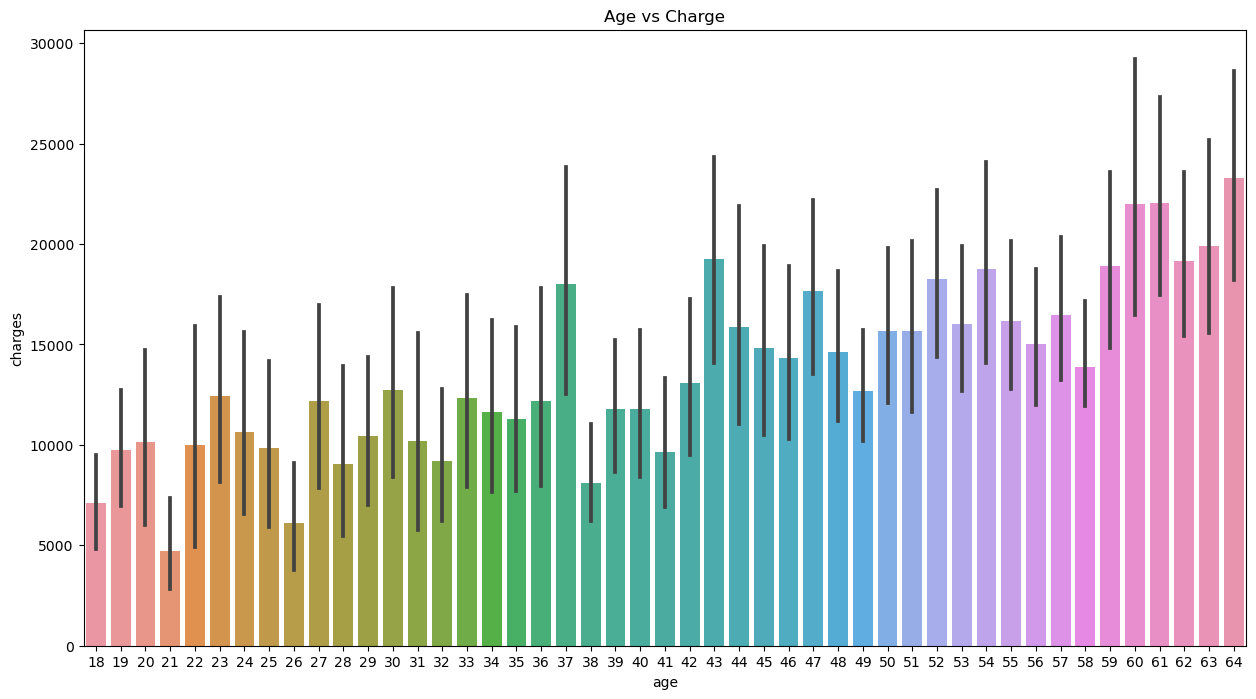

In [145]:
plt.figure(figsize=(15,8))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy)

Text(0.5, 1.0, 'BMI VS Charge')

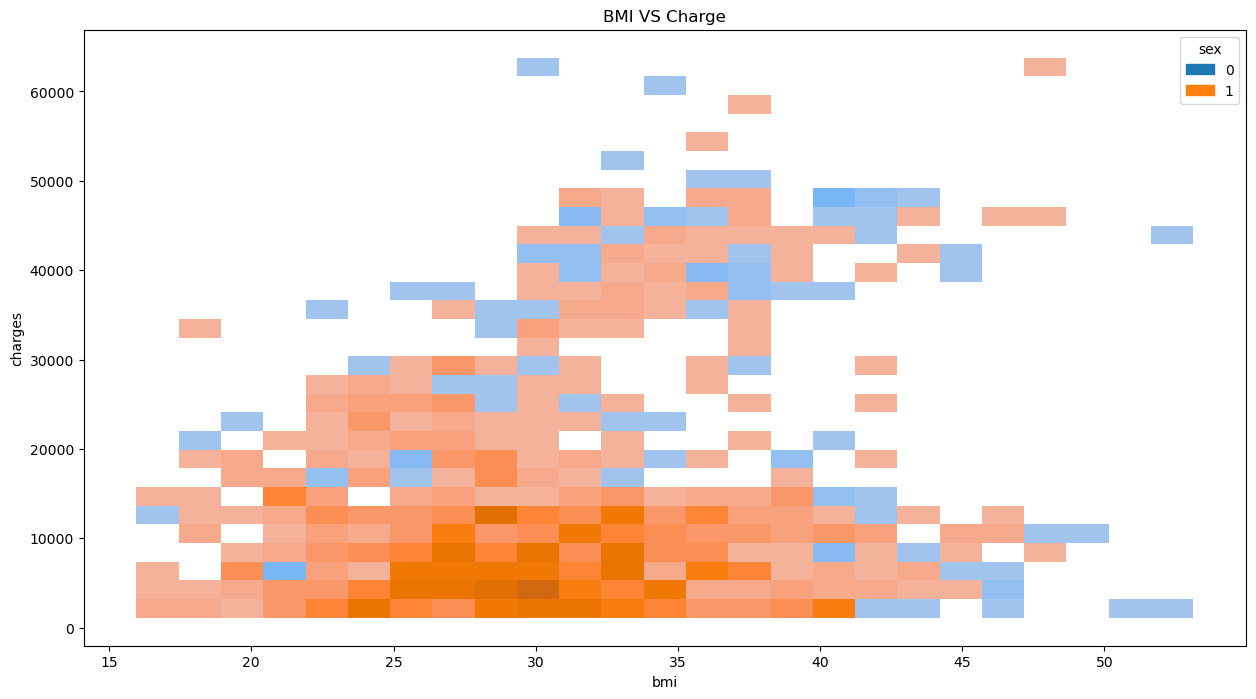

In [153]:
plt.figure(figsize=(15,8))
sns.histplot(x='bmi',y='charges',hue='sex',data=data_copy)
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

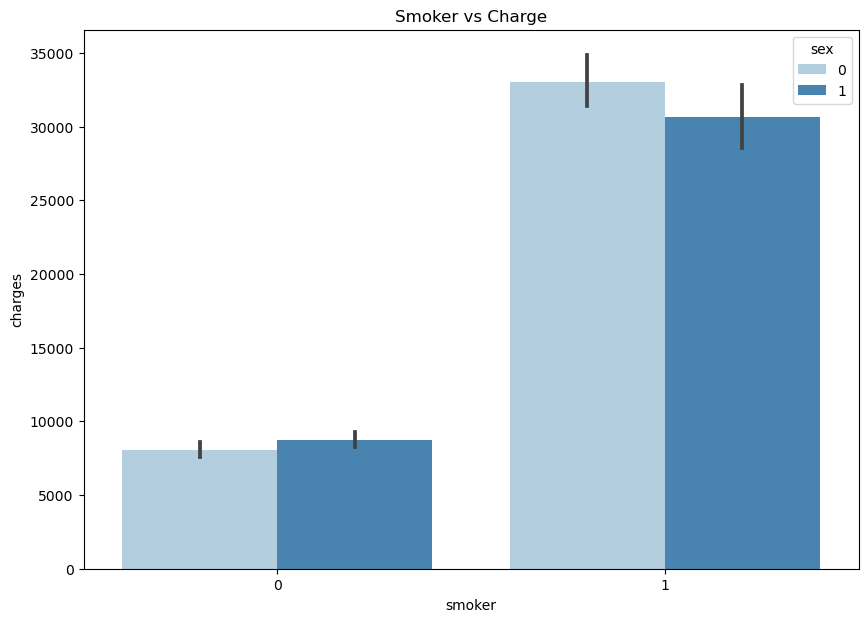

In [155]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

Text(0.5, 1.0, 'Sex vs Charges')

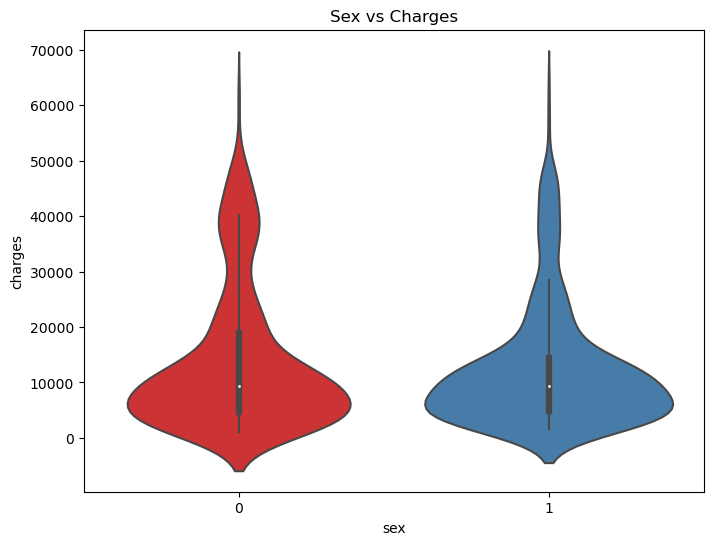

In [162]:
plt.figure(figsize=(8,6))
sns.violinplot(x='sex',y='charges',data=data_copy,palette='Set1')
plt.title('Sex vs Charges')

In [163]:
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


Text(0, 0.5, 'Count')

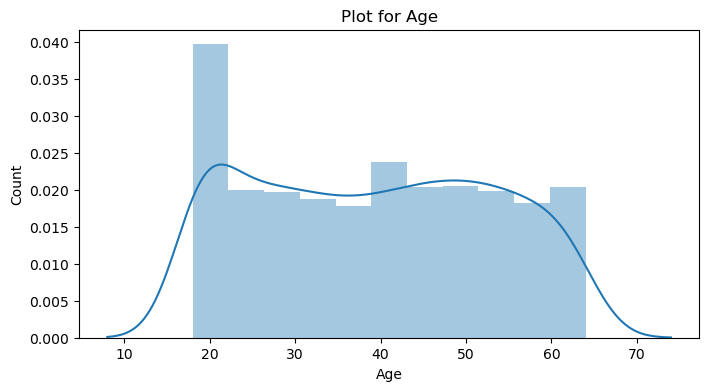

In [167]:
plt.figure(figsize=(8,4))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

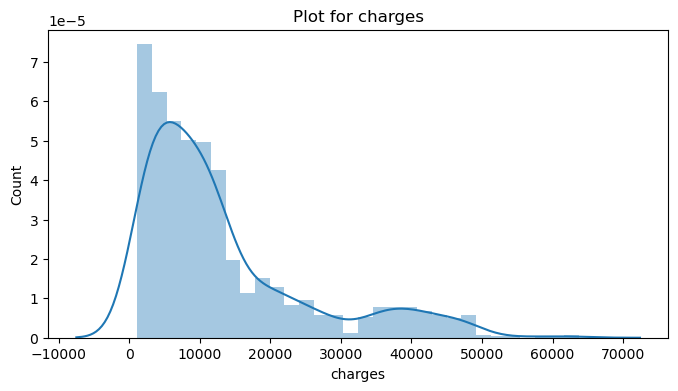

In [169]:
plt.figure(figsize=(8,4))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

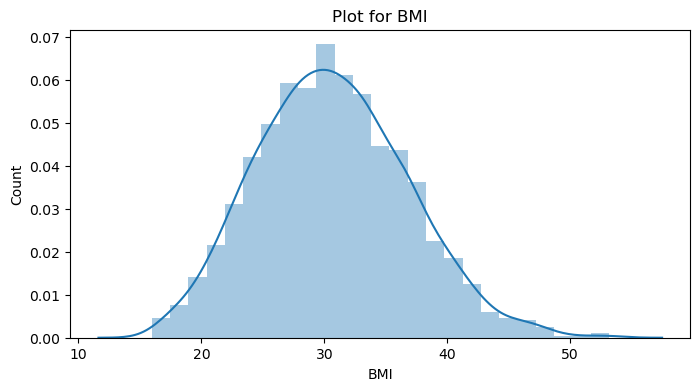

In [170]:
plt.figure(figsize=(8,4))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

In [214]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [215]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [221]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


LinearRegression()

In [222]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


In [223]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled.ravel())

In [224]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [225]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561499


In [226]:
cv_svr = svr_grid.best_score_
y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)
y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


In [227]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [228]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

In [229]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [238]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.784
RMSE : 0.465


In [240]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),  
         ]

In [241]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.479808,0.741410,0.782694,0.744528
1,Ridge Regression,0.465206,0.741150,0.783800,0.825999
2,Support Vector Regression,0.358769,0.857235,0.871285,0.831128


In [242]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [243]:
X_ = data_copy.drop('charges',axis=1).values
y_ = data_copy['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [251]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.884
R2 score (test) : 0.878


In [252]:
pred=rf_tuned_loaded.predict(np.array([20,1,28,0,1,3]).reshape(1,6))[0]

In [253]:
print('{0:.3f}'.format(pred))

19032.733
